# Analysis of Model Performance Evaluation Results

Each model has been trained multiple times and evaluated with a set of performance metrics.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# helper functions for plotting
!pip install -q --upgrade git+https://github.com/goerlitz/dataplot.git

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import dataplot.pandas as dp
from pathlib import Path

## Load Data

In [4]:
data_path = Path('../../data/')

eval_file = data_path / "transformers_eval10kgnad.csv"

In [5]:
results_df = pd.read_csv(eval_file)
results_df.head()

,start_time,runtime,model_name,global_step,mcc,train_loss,eval_loss,f1,acc,precision,recall
0,2021-05-15 21:48:08 GMT,594,distilbert-base-german-cased,4624,0.8729,0.0011,0.6367,0.8854,0.8891,0.8905,0.8812
1,2021-05-15 21:58:17 GMT,588,distilbert-base-german-cased,4624,0.8829,0.0058,0.6255,0.8960,0.8979,0.9003,0.8924
2,2021-05-15 22:08:20 GMT,589,distilbert-base-german-cased,4624,0.8818,0.8700,0.6099,0.8953,0.8969,0.9016,0.8902
3,2021-05-15 22:18:24 GMT,588,distilbert-base-german-cased,4624,0.8840,1.3547,0.5980,0.8956,0.8988,0.8986,0.8931
4,2021-05-15 22:28:27 GMT,609,distilbert-base-german-cased,4624,0.8695,0.0028,0.6323,0.8815,0.8862,0.8856,0.8781


## Model Overview

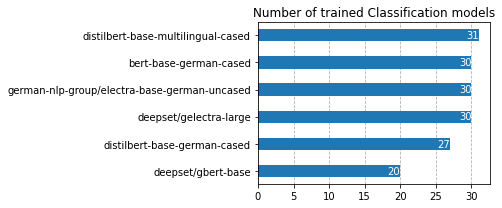

In [6]:
dp.countplot(results_df, "model_name", annotate="value", title="Number of trained Classification models", figsize=(7,3));

## Model Performance

In [7]:
def boxplot(df, metric, by, title=None, figsize=None):
    ordered = df.groupby(by)[metric].median().sort_values(ascending=True)
    names = ordered.index
    data = [df[lambda x: x[by] == name][metric] for name in names]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.boxplot(data, labels=names, zorder=2)
    ax.set_xticklabels(labels=names, rotation=50, ha="right")
    ax.yaxis.grid(True, linestyle='--', zorder=1)
    ax.set_title(title)
    
    fig.tight_layout()
    return fig

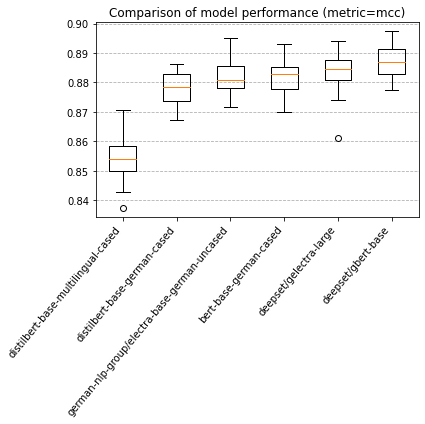

In [8]:
metric = "mcc"
boxplot(results_df, metric, "model_name", title=f"Comparison of model performance (metric={metric})", figsize=(6,6));